In [4]:
from scipy.sparse import spmatrix, csr_matrix
import torch
import torchvision
from scipy.spatial.distance import squareform
import scipy
from numba import jit
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
import seaborn as sns

import paradime as prdm

In [8]:
paradime_colors = {
    "yellow": "#ffcc00",
    "teal": "#144447",
    "cyan": "#23c7a2",
    "red": "#ed3d3d",
    "brown": "#9d6700",
    "purple": "#9a6095",
    "green": "#4c9900", #"#61b60e",
    "orange": "#fd771e",
    "pink": "#f9adc3",
    "grey": "#a1a39d",
    "background": "#fcfcfc",
}
paradime_palette = sns.color_palette(
    [ paradime_colors[i] for i in [
        "teal", "yellow", "cyan", "red", "pink",
        "green", "brown", "grey", "purple", "orange",
    ] ], 10)

plt.rcParams['axes.facecolor'] = paradime_colors['background']
plt.rcParams['savefig.facecolor'] = paradime_colors['background']

In [9]:
mnist = torchvision.datasets.MNIST(
    './data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

In [10]:
num_pts = 5000
testdata = mnist.data.reshape(-1, 28*28) / 255.
testdata = testdata[:num_pts][np.argsort(mnist.targets[:num_pts])]
testtargets = np.sort(mnist.targets[:num_pts])

In [26]:
foo = prdm.routines.ParametricTSNE(
    perplexity=100,
    dataset=testdata,
    init_epochs=5,
    epochs=30,
    batch_size=100,
    use_cuda=True,
    verbose=True
)

2022-08-02 17:42:46.7: Registering dataset.


In [27]:
foo.train()

2022-08-02 17:42:48.8: Adding entry 'pca' to dataset.
2022-08-02 17:42:48.8: Computing global relations 'rel'.
2022-08-02 17:42:56.2: Beginning training phase 'pca_init'.
2022-08-02 17:42:58.3: Loss after epoch 0: 25.06684535741806
2022-08-02 17:42:58.8: Beginning training phase 'embedding'.
2022-08-02 17:42:59.4: Loss after epoch 0: 3214.400909423828
2022-08-02 17:43:02.3: Loss after epoch 5: 2953.305145263672
2022-08-02 17:43:05.2: Loss after epoch 10: 2852.391357421875
2022-08-02 17:43:08.2: Loss after epoch 15: 2850.5586547851562
2022-08-02 17:43:11.1: Loss after epoch 20: 2735.4146728515625
2022-08-02 17:43:14.0: Loss after epoch 25: 2729.0034790039062


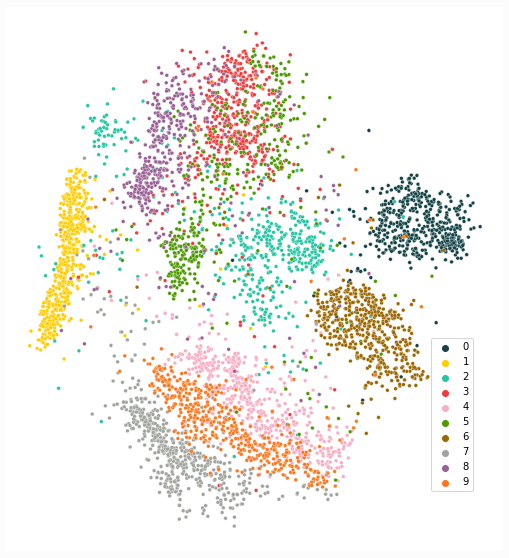

In [28]:
emb = foo(testdata.cuda()).detach().cpu()
fig = plt.figure(figsize=(10,10))
fig.set_facecolor(paradime_colors['background'])
sp = sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=testtargets,
    s=14., alpha=1., edgecolor="white",  palette=paradime_palette)
sp.tick_params(bottom=False, left=False)
sp.set(xticklabels=[],yticklabels=[], aspect=1.)
sns.despine(top=True, left=True, bottom=True, right=True)
sns.move_legend(sp, "lower right", bbox_to_anchor=(.95,0.1))

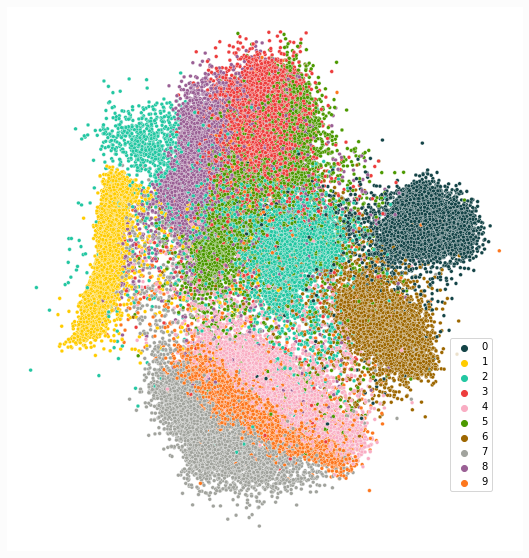

In [29]:
emb2 = foo.model((mnist.data.reshape(-1, 28*28) / 255.).cuda()).detach().cpu()
fig = plt.figure(figsize=(10,10))
fig.set_facecolor(paradime_colors['background'])
sp = sns.scatterplot(x=emb2[:,0], y=emb2[:,1], hue=mnist.targets,
    s=14., alpha=1., edgecolor="white",  palette=paradime_palette)
sp.tick_params(bottom=False, left=False)
sp.set(xticklabels=[],yticklabels=[], aspect=1.)
sns.despine(top=True, left=True, bottom=True, right=True)
sns.move_legend(sp, "lower right", bbox_to_anchor=(.95,0.1))

In [11]:
dr = prdm.routines.ParametricUMAP(
    n_neighbors=100,
    dataset=testdata,
    verbose=True
)
dr.train()

2022-08-03 14:38:28.5: Registering dataset.
2022-08-03 14:38:28.5: Computing global relations 'rel'.
2022-08-03 14:38:28.5: Indexing nearest neighbors.
2022-08-03 14:38:44.6: Calculating probabilities.
2022-08-03 14:38:48.5: Adding entry 'spectral' to dataset.
2022-08-03 14:38:48.5: Beginning training phase 'spectral_init'.
2022-08-03 14:38:49.1: Loss after epoch 0: 534.2167767286301
2022-08-03 14:38:50.2: Beginning training phase 'embedding'.
2022-08-03 14:38:51.0: Loss after epoch 0: 24036.479787826538
2022-08-03 14:38:55.1: Loss after epoch 5: 1610.9100589752197
2022-08-03 14:38:59.1: Loss after epoch 10: 1470.0463981628418
2022-08-03 14:39:03.1: Loss after epoch 15: 1379.5175342559814
2022-08-03 14:39:07.5: Loss after epoch 20: 1436.2814025878906
2022-08-03 14:39:11.5: Loss after epoch 25: 1378.3823142051697


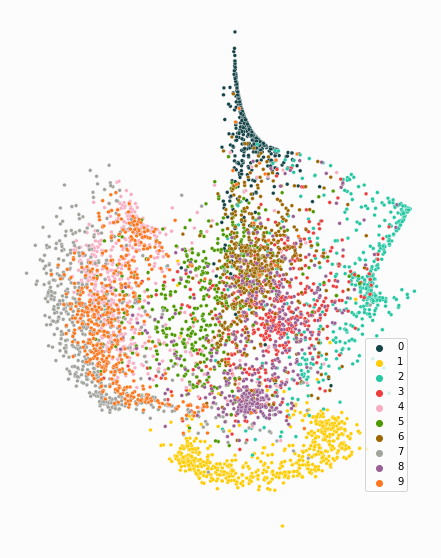

In [17]:
emb = dr(testdata).detach().cpu()
fig = plt.figure(figsize=(10,10))
fig.set_facecolor(paradime_colors['background'])
sp = sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=testtargets,
    s=14., alpha=1., edgecolor="white",  palette=paradime_palette)
sp.tick_params(bottom=False, left=False)
sp.set(xticklabels=[],yticklabels=[], aspect=1.)
sns.despine(top=True, left=True, bottom=True, right=True)
sns.move_legend(sp, "lower right", bbox_to_anchor=(.95,0.1))